## Graph Creation

Let's begin by constructing the example graph from class.

In [1]:
# initialize the directed graph
import networkx as nx
G = nx.DiGraph()

# add source and target nodes
G.add_node('s')
G.add_node('t')

# add edges -- automatically adds nodes
G.add_edge('u', 'v')
G.add_edges_from([('s', 'u'), ('s', 'v')])
G.add_edges_from([('u', 't'), ('v', 't')])

The graph is small enough that we can draw it to make sure it's correct.

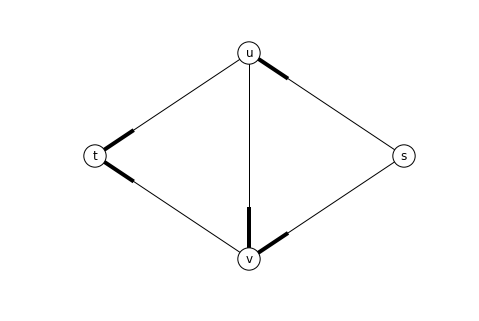

In [2]:
# this "magic" is needed to draw graphs
%matplotlib inline

# we need to explicitly state that we want to see node labels
# there are several ways to layout graphs, the 'circular' one
# gives a good result here
nx.draw_circular(G, with_labels=True, node_color='w', node_size=500)

## Max Flow

To complete the formulation of the max flow problem, we need to add the capacities.

In [3]:
# add capacities to the edges
G.edge['s']['u']['capacity'] = 20
G.edge['s']['v']['capacity'] = 10
G.edge['u']['v']['capacity'] = 30
G.edge['u']['t']['capacity'] = 10
G.edge['v']['t']['capacity'] = 20

We can now solve the max flow problem in just a single call.

In [4]:
flow_value, flow = nx.maximum_flow(G, 's', 't')

# this gives a cleaner way to print out the flow
def print_flow(flow):
    for edge in G.edges():
        n1, n2 = edge
        print edge, flow[n1][n2]


print 'Flow value =', flow_value
print 'Flow ='
print_flow(flow)

Flow value = 30
Flow =
('s', 'u') 20
('s', 'v') 10
('u', 't') 10
('u', 'v') 10
('v', 't') 20


The maximum flow should equal the minimum cut.

In [5]:
max_flow_value = nx.maximum_flow_value(G, 's', 't')
min_cut_value = nx.minimum_cut_value(G, 's', 't')

print max_flow_value == min_cut_value

True


## Flows with Demands

Let's now record a demand value at each node (negative demand corresponds to supply at a node).

In [6]:
# to add a property to a node, you should use G.node['s'] rather than
# G['s'] to reference the node.

G.node['s']['demand'] = -25 
G.node['t']['demand'] = 20
G.node['u']['demand'] = 5
G.node['v']['demand'] = 0

We'll create a copy of the graph to extend it and solve the flow-with-demands problem as a max-flow problem.

In [13]:
# create deep copy of the graph
GD = G.copy()

# add new source and terminal nodes
GD.add_node('source')
GD.add_node('terminal')

# add edges of required capacity
for node in G.nodes():
    demand = G.node[node]['demand']
    if demand < 0:
        GD.add_edge('source', node)
        GD['source'][node]['capacity'] = -demand
    if demand > 0:
        GD.add_edge(node, 'terminal')
        GD[node]['terminal']['capacity'] = demand

Let's draw this new graph to check that it's correct.

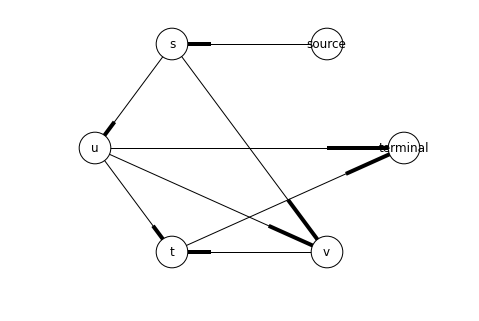

In [19]:
nx.draw_circular(GD, with_labels=True, node_color='w', node_size=1000)

Now we compute the max flow to obtain the flow with demands.

In [20]:
flow_value, flow = nx.maximum_flow(GD, 'source', 'terminal')

print 'Flow value =', flow_value
print 'Flow ='
print_flow(flow)

Flow value = 25
Flow =
('s', 'u') 20
('s', 'v') 5
('u', 't') 10
('u', 'v') 5
('v', 't') 10


This is a valid solution, but it's not the same as the one we had in class!

## Min-Cost Flow

Let's now solve for the min-cost flow of the example we had in class. We have already added capacities and demands to our network. We finally need to introduce edge costs (weights).

In [21]:
G.edge['s']['u']['weight'] = 1
G.edge['s']['v']['weight'] = 1
G.edge['u']['v']['weight'] = 1
G.edge['u']['t']['weight'] = 1
G.edge['v']['t']['weight'] = 2

Now we can just call the min-cost flow function. Note that we could have used this to solve the flow-with-demands problem, just by setting all the costs (weights) to 0.

In [22]:
flow = nx.min_cost_flow(G)
print_flow(flow)

('s', 'u') 15
('s', 'v') 10
('u', 't') 10
('u', 'v') 0
('v', 't') 10


This is the same as the maximum flow found in class. For this example, the maximum flow is unique.

## Exercises

1. Write a function to compute a conformal decomposition of a flow with demands, and run it on the flows found in the Flows with Demands and Min-Cost Flow sections above.

2. Construct the bipartite graph from the example application and find a matching using max flow.

## Problem

A mapping website would like to photograph both sides of all the streets in a city. (Think of Google Street View.) You are tasked with finding routes such that the cars travel the minimum distance possible.

1. Download the road network for the city of Oldenburg, provided [here](http://www.cs.fsu.edu/~lifeifei/SpatialDataset.htm), and read in the graph using NetworkX, including distances. Ensure there are edges in both directions between connected nodes.

2. Compute a minimum cost flow such that each edge is visited at least once, i.e., the flow on each edge is at least 1. The cost of an edge is the distance between the nodes. Cars must return to where they started from, so the demand at every node is 0.

3. Given the optimal flow, determine a route a car should take to photograph all streets (both sides) in the city.